<a href="https://colab.research.google.com/github/azamjon98/final_project/blob/main/avia_company_satisfaction_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'aviakompaniya:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F36191%2F3544842%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240614%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240614T062017Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D62196122a215d915abdf086f703a55644ba5385ba83aa2d8a6db09598c1e84a56c55b944b415f4ff18554423e9cf6032d94e76aecf4f855c9985a9891f26a424483e44a4f18666d08b1d178cc90b4a31f85e8b9cce5f2d609118c9ee76013b99d0d1a0c711c0d4e2046d136f5bee1bd11f280a2c47b8ee3515f6c5bb3edd09976156f64775b57d34f648f56f1e429daf1c2a7b938421978bc2504db9b3e08060c73273f07a076da7ec4161a865b5527a53278614031b11fc8f7c692ae66b2d2cfc15f41b14ef5030a431cdeb6a9bfbe6fda578ce65199cfccb323211ba9c145d530a6e011302e9983924256aa6f0cfae3998a1a93c6d0faf49ef4d7766cfd521'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 250323 bytes downloaded
Downloaded and uncompressed: aviakompaniya
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/test_dataset.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/sample_submission.csv


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
encoder=OrdinalEncoder()
scaler=StandardScaler()

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

from sklearn.neighbors import KNeighborsClassifier


from sklearn.svm import SVC
svc=SVC()

from xgboost import XGBClassifier
xgb=XGBClassifier()

from sklearn.metrics import roc_curve, roc_auc_score, auc

In [4]:
train=pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv')
test=pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')
train.shape, test.shape

((10000, 24), (4000, 23))

In [14]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


### Exploratory data analysis

In [15]:
df=train.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

#### Arrival Delay in Minutes columns has 28 nan values we will treat later

In [16]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


#### we do not need id sp we will drop it

In [17]:
df=df.drop('id',axis=1)

In [18]:
# let's count all unique values oin each column
cols=df.columns
for i in range(len(cols)):
    print('column name: ',cols[i])
    print('all unique values: ',df[cols[i]].unique())
    print('total number of unique values: ',df[cols[i]].nunique())
    print('-'*60)

column name:  Gender
all unique values:  ['Male' 'Female']
total number of unique values:  2
------------------------------------------------------------
column name:  Customer Type
all unique values:  ['disloyal Customer' 'Loyal Customer']
total number of unique values:  2
------------------------------------------------------------
column name:  Age
all unique values:  [33 49 43 27 11 30 38 39 24 62 42 59 19 56 46 47 31 36 29 52 34 44 45 58
 41 69 67 68 25 54 40 55 60 26 15 61 20 64 57 53 13 50 48 51 17 23 72 80
 28  8 37  9 21 32 65 12 22 35 18 10 16 63  7 70 66 77 79 73 14 71 76 74
 75 78]
total number of unique values:  74
------------------------------------------------------------
column name:  Type of Travel
all unique values:  ['Business travel' 'Personal Travel']
total number of unique values:  2
------------------------------------------------------------
column name:  Class
all unique values:  ['Eco' 'Business' 'Eco Plus']
total number of unique values:  3
-----------------

#### treating nan values

In [19]:
df['Arrival Delay in Minutes'].isna().sum()

28

In [20]:
df['Arrival Delay in Minutes'].unique()

array([  3.,   0.,  18.,  10.,   5.,  17.,  60.,  61.,   2.,  32.,   1.,
        51.,  14.,  16.,  21., 134.,   7.,  28.,   8.,   4.,  26., 105.,
        50., 260.,   6.,  22.,  47.,   9., 204.,  25.,  41.,  48.,  20.,
        12.,  31.,  72.,  23.,  33.,  64.,  13.,  nan, 131., 299.,  38.,
        34.,  71.,  73., 109.,  87.,  29.,  46., 226., 199., 118., 148.,
        56.,  40.,  19., 129.,  11.,  27., 121.,  44.,  83.,  15.,  97.,
       235.,  92.,  35.,  70., 279.,  39.,  85.,  43., 167., 111.,  63.,
       500.,  49., 155.,  84., 208.,  37.,  53.,  67.,  90.,  55.,  24.,
        30.,  65.,  99.,  78.,  52.,  54., 256.,  89.,  94.,  36.,  58.,
       107.,  76.,  57.,  88., 247., 120.,  69., 139., 123.,  62., 334.,
        86., 174., 115.,  93., 222.,  59., 103.,  74.,  68., 288., 175.,
        96., 168., 183.,  77., 190.,  42.,  81., 188.,  45., 159., 122.,
       152., 217., 135., 104.,  79.,  95., 100., 158., 186., 153., 113.,
       138., 146., 228., 127., 133., 232., 185., 19

#### Let's see its distribution

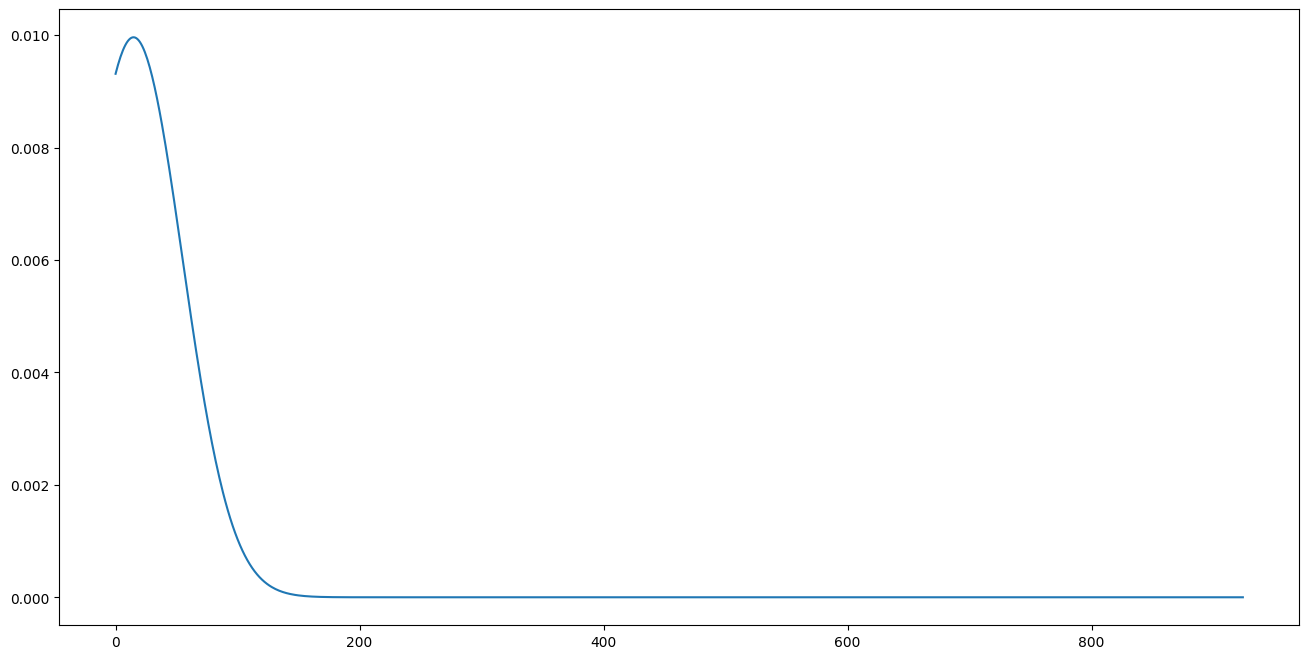

In [21]:
x=df['Arrival Delay in Minutes'].sort_values()
y=norm.pdf(x,loc=x.mean(),scale=x.std())
plt.figure(figsize=(16,8))
plt.plot(x,y)
plt.show()

### It is very highly right skewed so we should apply ffill method

In [22]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(method='ffill')

In [23]:
df['Arrival Delay in Minutes'].isna().sum()

## now there is no any none values

0

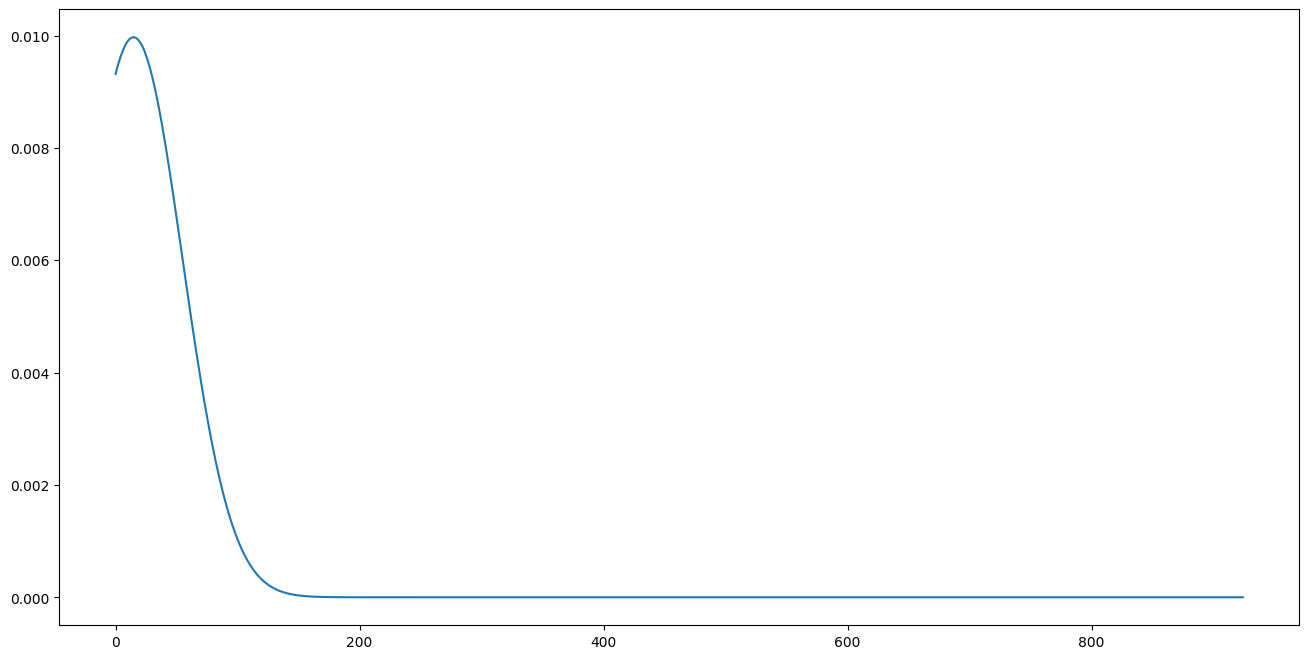

In [24]:
x=df['Arrival Delay in Minutes'].sort_values()
y=norm.pdf(x,loc=x.mean(),scale=x.std())
plt.figure(figsize=(16,8))
plt.plot(x,y)
plt.show()

### Data visualization

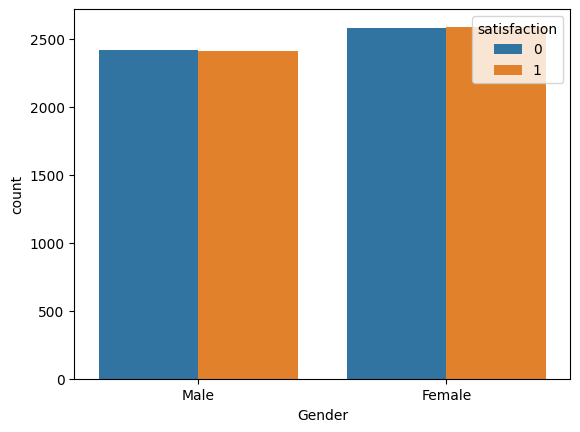

In [25]:
## satisfaction score by gender

sns.countplot(data=df,x='Gender',hue='satisfaction')
plt.show()

### The ratio of satisfied and not satisfied clients according to gender is equal to each other, and we have a bit more female clients than males

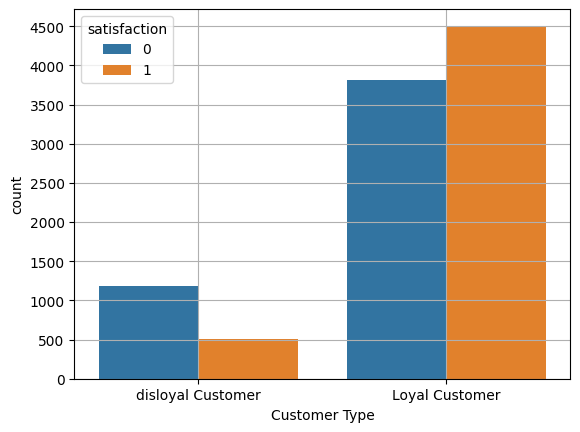

In [26]:
### satisfaction score by 'Customer Type'
sns.countplot(data=df, x='Customer Type',hue='satisfaction')
plt.yticks(np.arange(0,5000,500))
plt.grid()
plt.show()

### among loyal customers 45% of total are satisfied while 38 % of total have complaints, and figures for disloyal customers equal to 5% and 12% respectively.

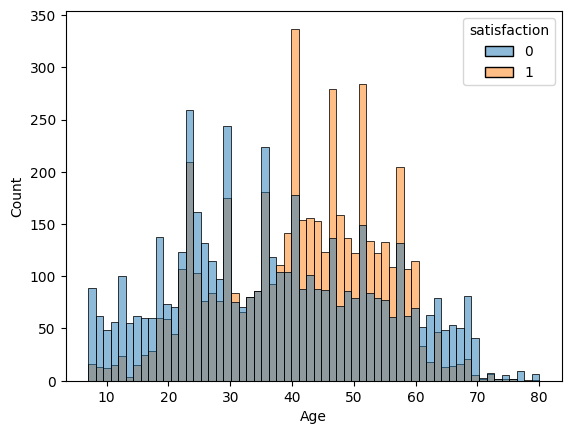

In [27]:
## satisfaction score for the 'Age' column
sns.histplot(data=df,x='Age',hue='satisfaction',bins=60)
plt.show()

### exept among 45-60 age group, among all other age groups,the number of dissatisfied clients exceeds those who are satisfied

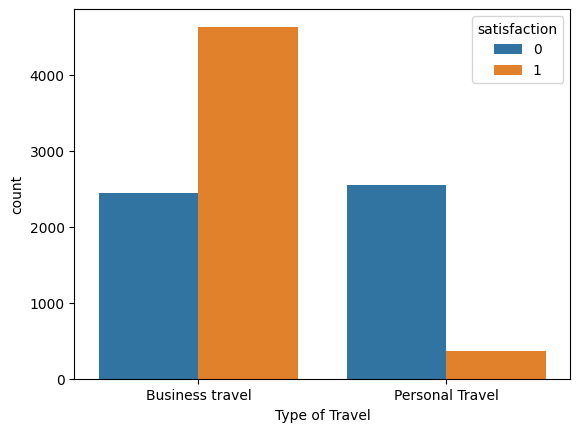

In [28]:
### satisfaction rate on 'Type of Travel'
sns.countplot(data=df,x='Type of Travel', hue='satisfaction')
plt.show()

### From above number of dissatisfied clients are equal on both cases. However clients have more copliances if they fly on personal reasons

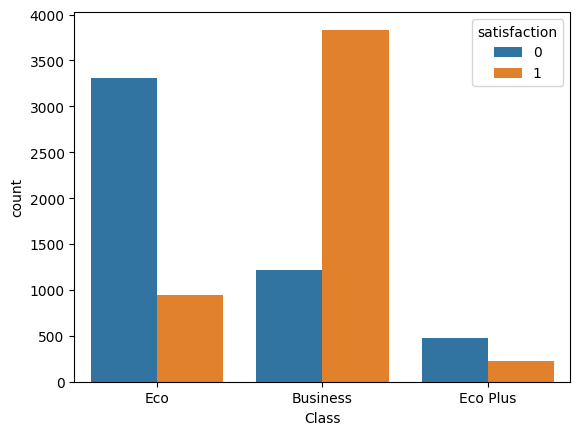

In [29]:
# satisfacion score on 'Class'
sns.countplot(data=df, x='Class',hue='satisfaction')
plt.show()

### Except business class users, there are much more dissatisfied clients than those who are satisfied

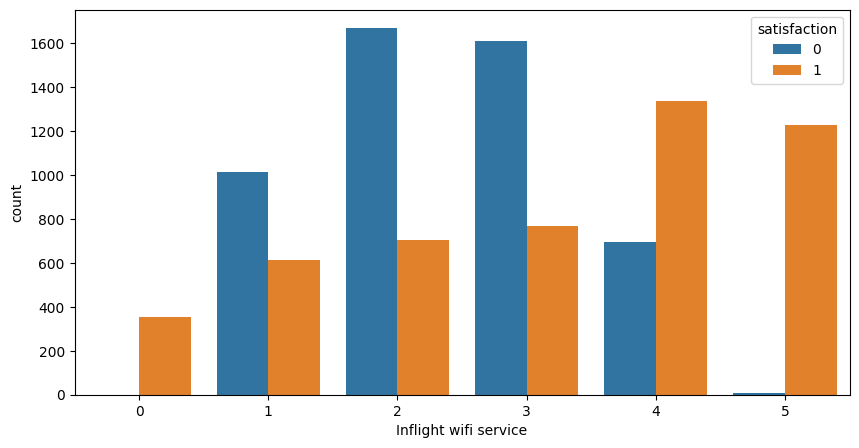

In [30]:
### Inflight wifi service
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Inflight wifi service',hue='satisfaction' )
plt.show()

#### here we can see that Inflight wifi service can also have some causes on dissatisfaction rate, if its score is 4 or 5, there are much more satisfied clients

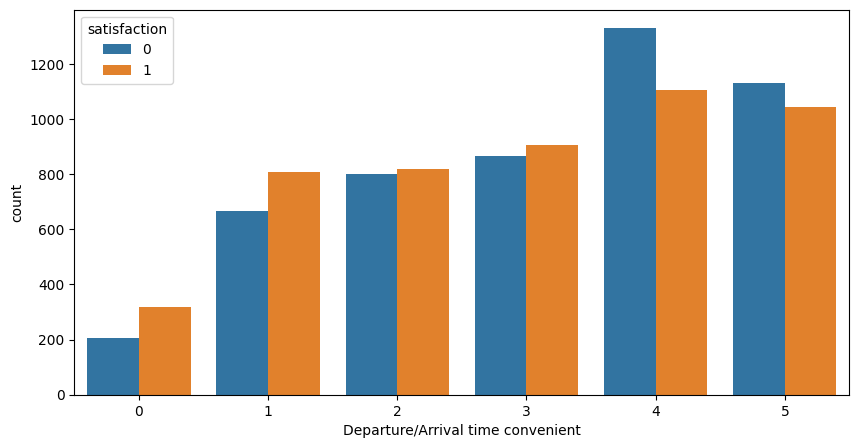

In [31]:
## Departure/Arrival time convenient
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Departure/Arrival time convenient',hue='satisfaction' )
plt.show()

### There is a litlle association between satisfaction score and Departure/Arrival time convenient

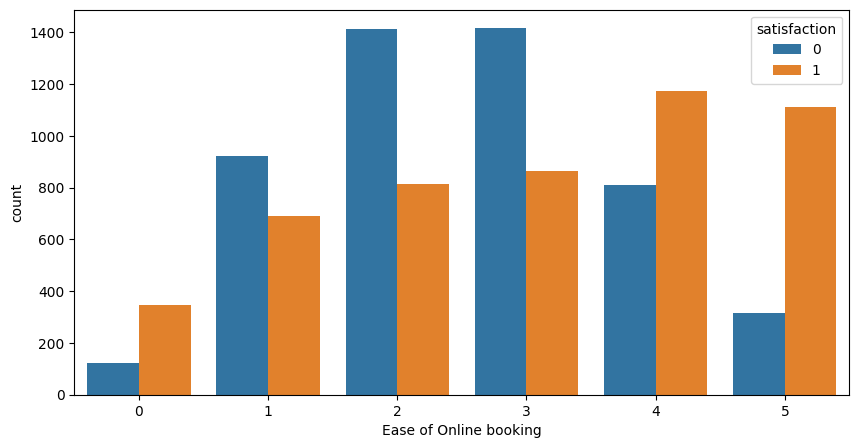

In [32]:
# Ease of Online booking
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Ease of Online booking',hue='satisfaction' )
plt.show()

#### here we can see that Ease of Online Booking can also have some causes on dissatisfaction rate, if its score is 4 or 5, there are much more satisfied clients

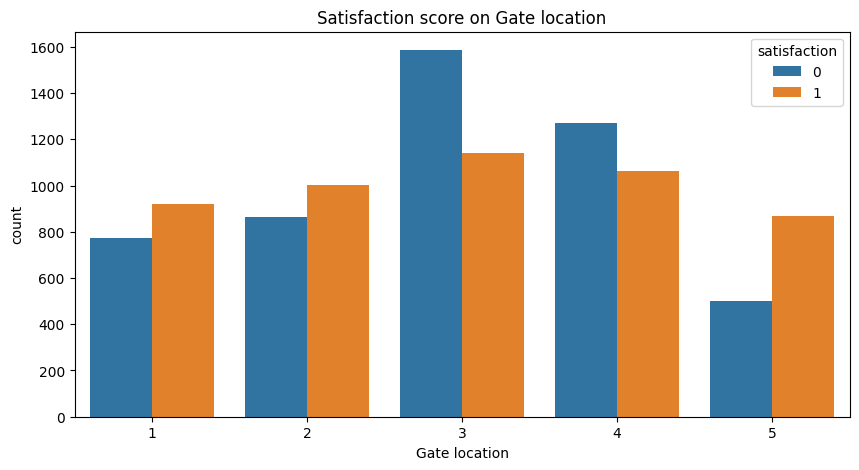

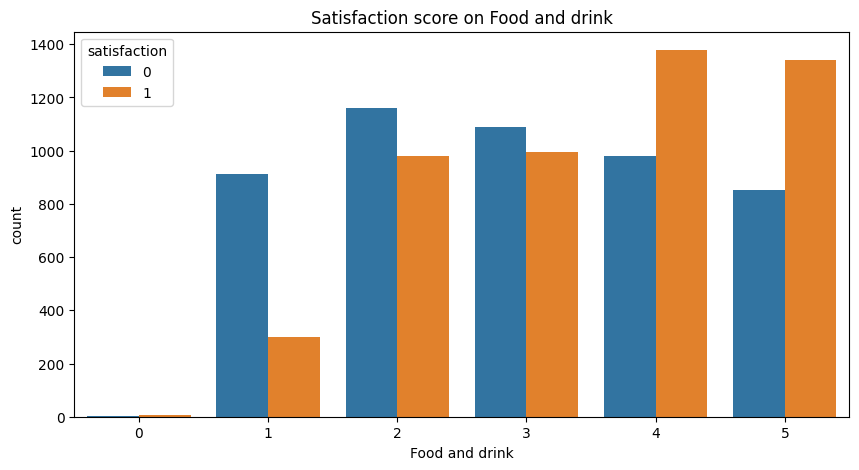

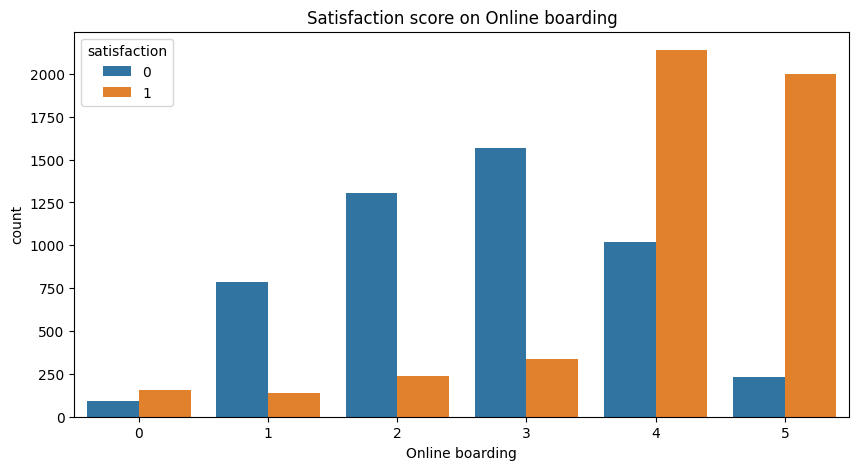

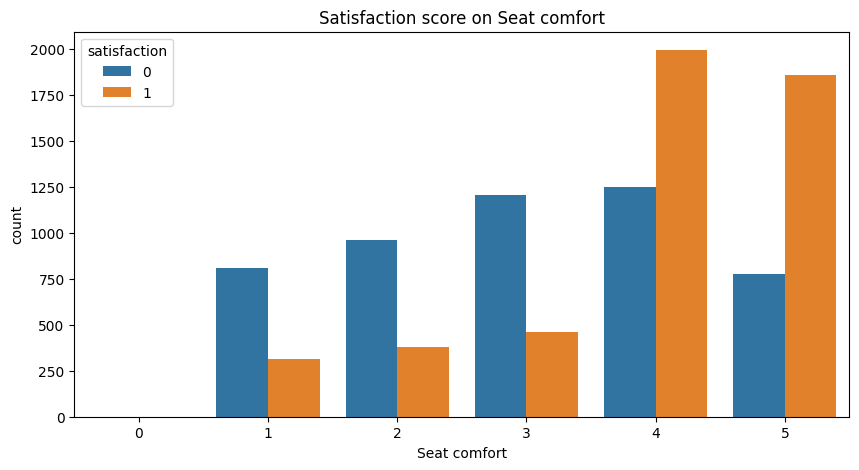

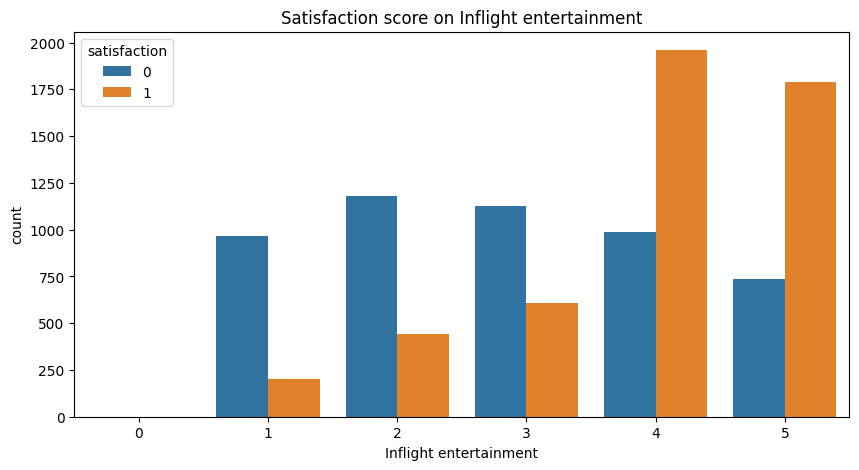

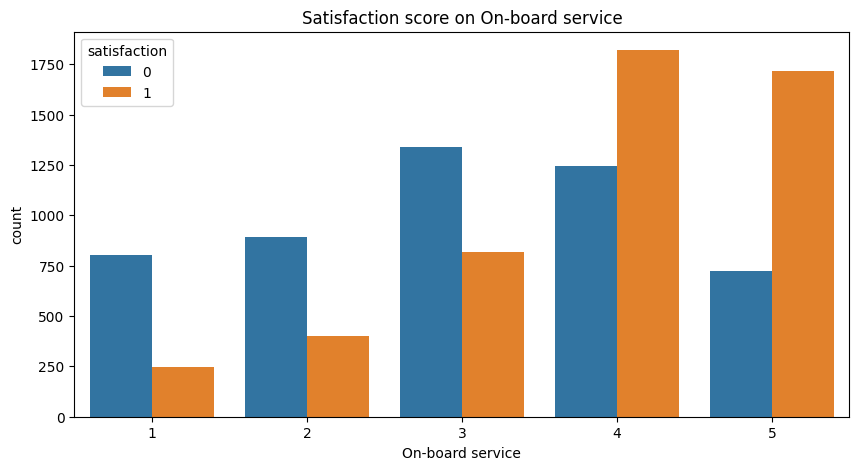

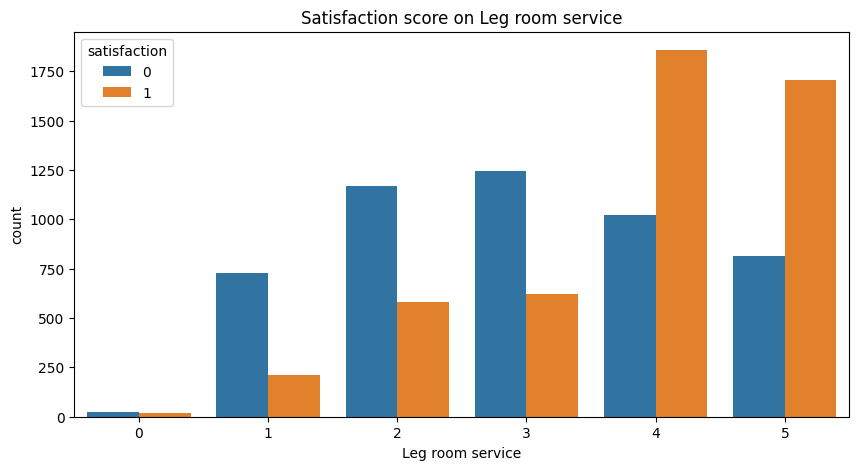

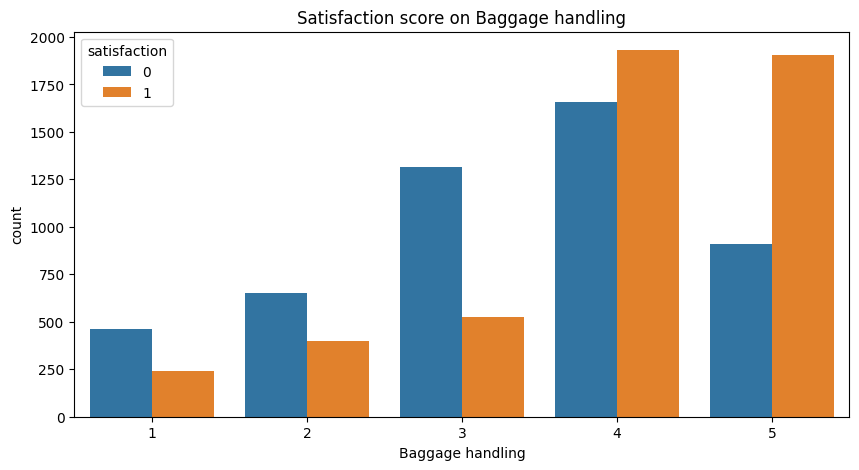

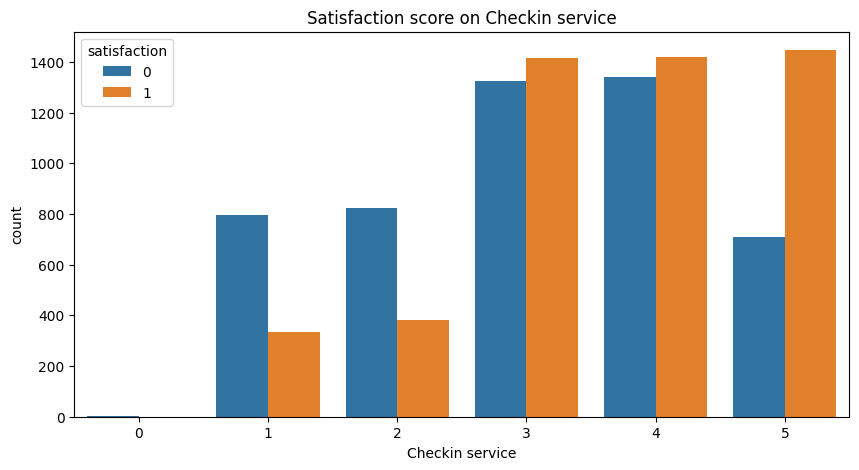

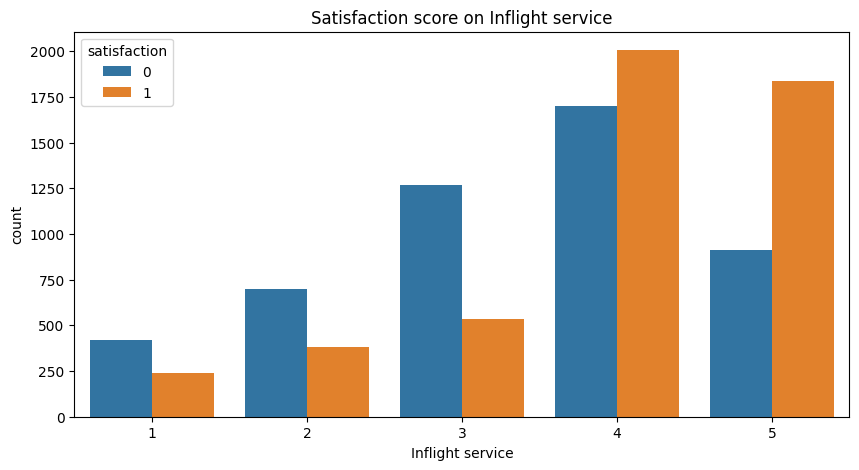

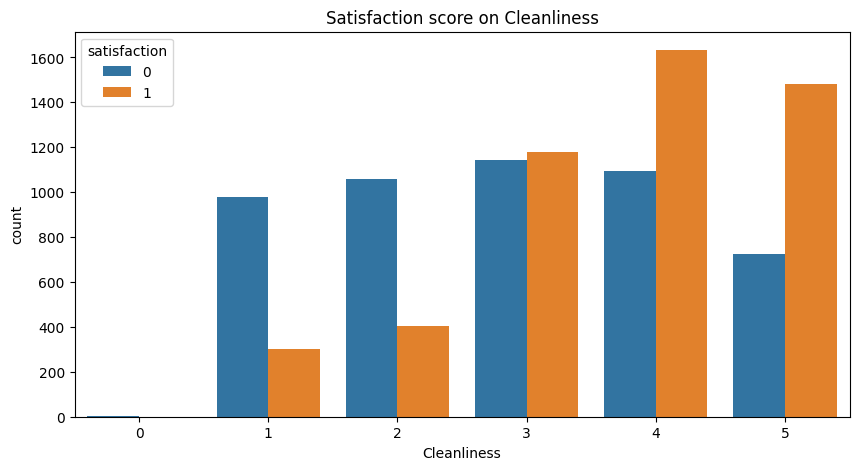

In [33]:
cols=['Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
## satisfaction score for other columns
for i in range(len(cols)):
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=cols[i],hue='satisfaction')
    plt.title(f"Satisfaction score on {cols[i]}")
    plt.show()

#### on above we can conclude that  if score is 4 or 5 they will satisfy

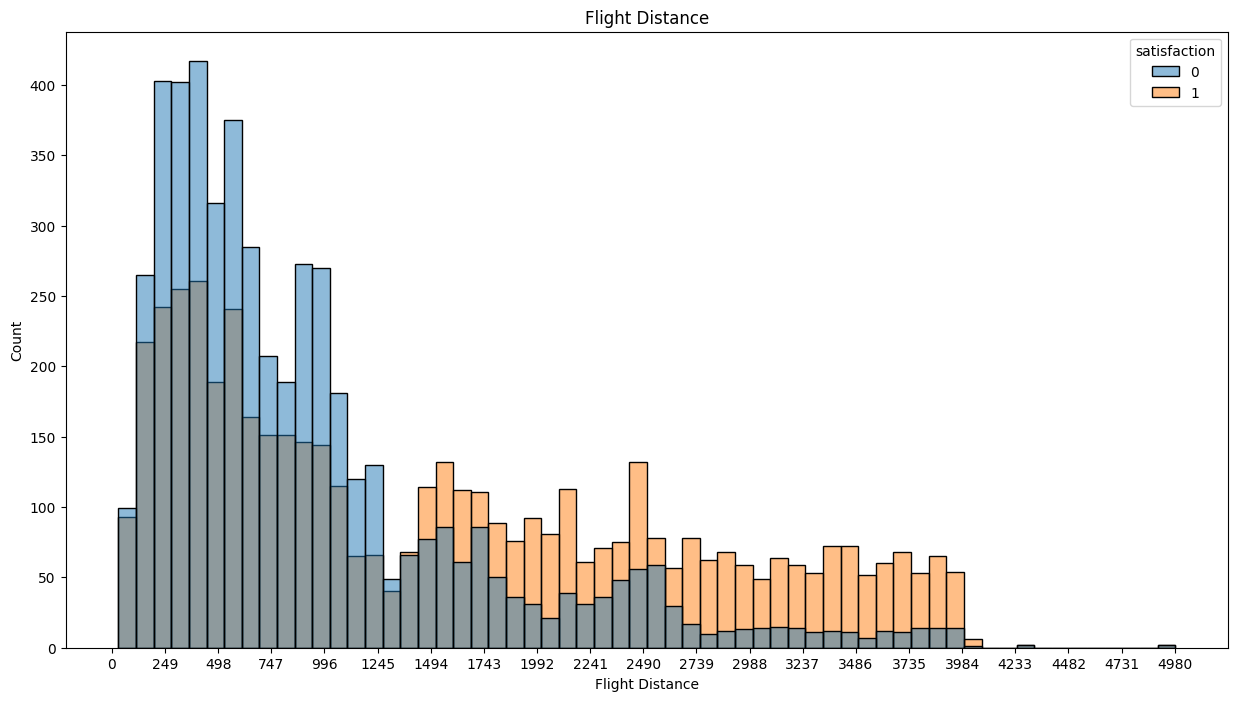

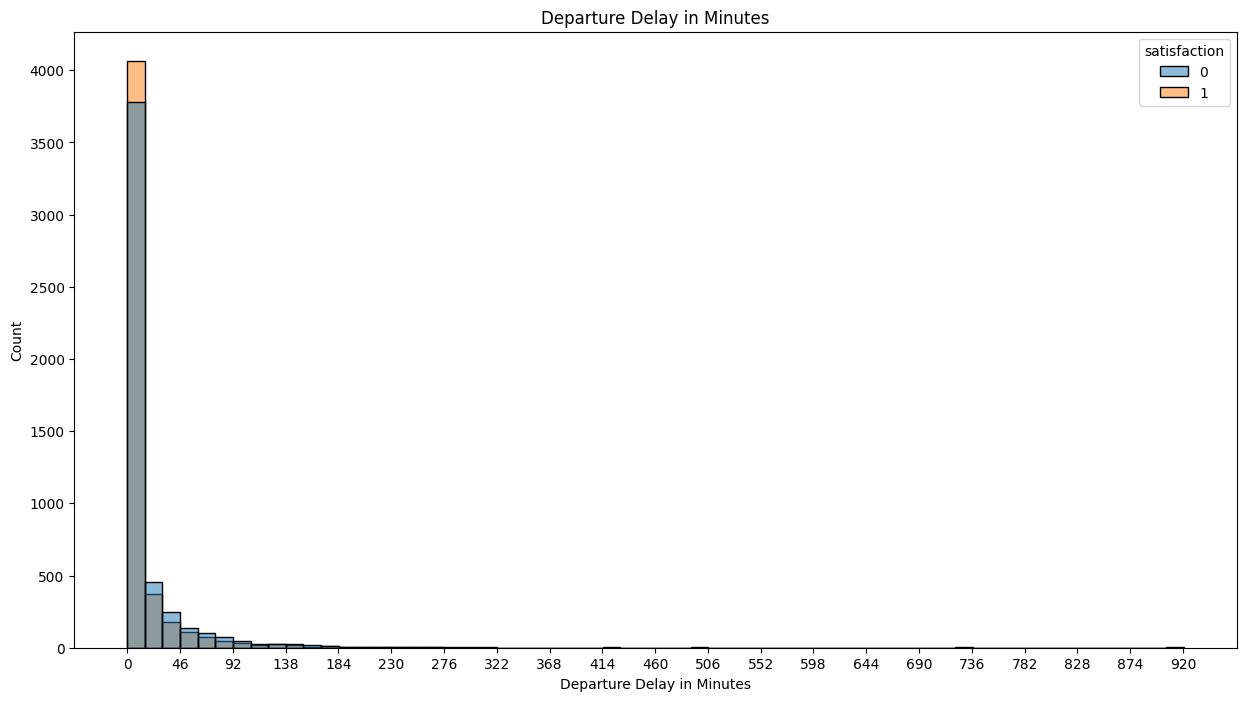

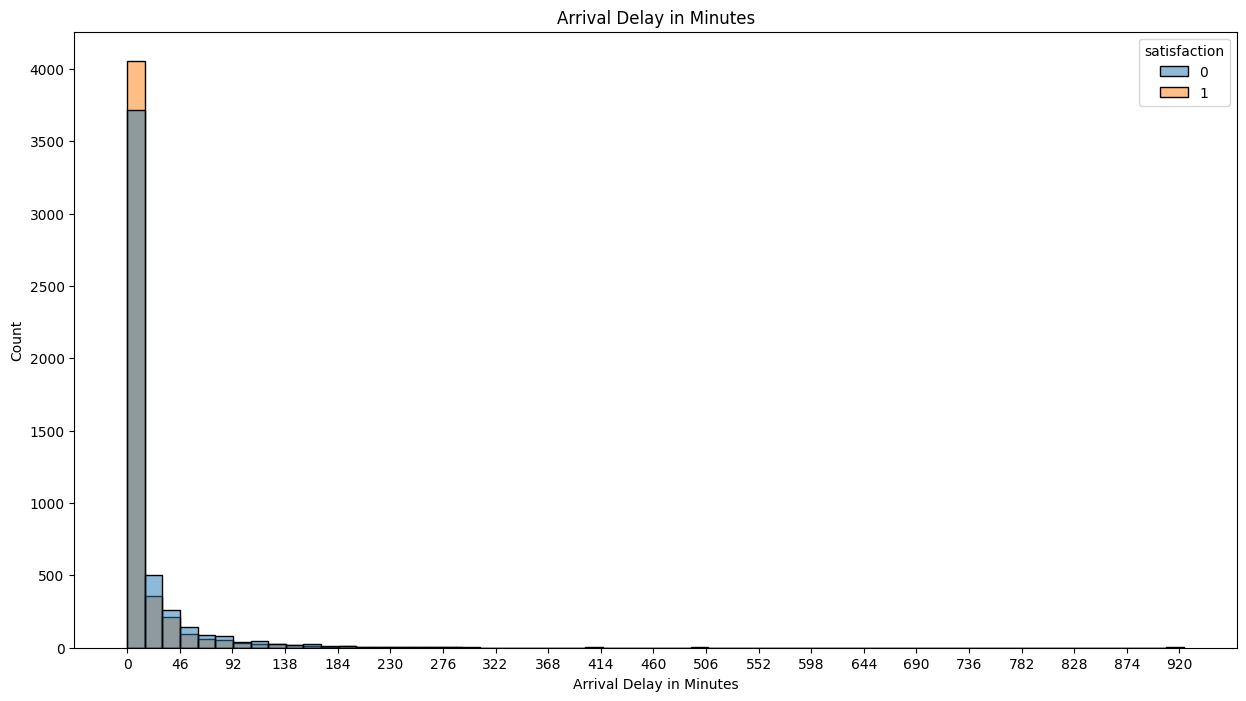

In [34]:
col=['Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']
for i in range(len(col)):
    plt.figure(figsize=(15,8))
    sns.histplot(data=df,x=col[i],hue='satisfaction',bins=60)
    plt.title(col[i])
    plt.xticks(np.arange(0,df[col[i]].max(),np.round(df[col[i]].max()/20)))
    plt.show()

### It is easy to see that more than 15 minutes delays can cause compliances, and interestingly, there are much more satisfied clients those who travelled more than 1300 units. And all data is highly right skewed

# Preprocessing

In [36]:
def preprocessing1(df):
    df=df.drop('id',axis=1)
    df=df.fillna(method='ffill')
    cols=['Gender', 'Customer Type','Type of Travel', 'Class']
    df[cols]=encoder.fit_transform(df[cols])
    if 'satisfaction' in df.columns:
        y=df['satisfaction']
        df=df.drop(columns='satisfaction')
    else:
        y=None
    X=df.copy()
    return X,y



In [37]:
x,y=preprocessing1(train)


### Feature selection:

| Method                        | Feature Type           | Target Type           | Use Case                                                   |
|-------------------------------|------------------------|-----------------------|------------------------------------------------------------|
| Chi-Square Test               | Categorical            | Categorical           | Classification with categorical features and target       |
| F-Test (ANOVA F-value)       | Continuous             | Categorical           | Classification with continuous features and categorical target |

In [38]:
from sklearn.feature_selection import chi2,SelectKBest,f_classif

In [39]:
col1=['Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']
x_f=x[col1].copy()
x_chi=x.drop(col1,axis=1)

In [41]:
f_scores = f_classif(x_f, y)
anova_p=pd.Series(f_scores[1], index=x_f.columns, name="anova_p_values")
anova_p.sort_values()

Flight Distance               3.357609e-205
Arrival Delay in Minutes       1.498066e-06
Departure Delay in Minutes     1.727657e-05
Name: anova_p_values, dtype: float64

### We should take all features because p_val_<0.05

In [42]:
chi2_scores=chi2(x_chi,y)
chi2_p=pd.Series(chi2_scores[1], index=x_chi.columns, name="chi2 p_values")
chi2_p.sort_values()

Type of Travel                        0.000000e+00
Class                                 0.000000e+00
Online boarding                      6.043256e-305
Age                                  3.270546e-257
Inflight entertainment               3.492407e-184
Seat comfort                         1.765197e-127
Leg room service                     9.567082e-117
Inflight wifi service                8.835702e-114
On-board service                     5.063543e-111
Cleanliness                          9.325755e-111
Customer Type                         1.580250e-61
Checkin service                       2.835148e-57
Food and drink                        6.939637e-54
Baggage handling                      2.035774e-53
Inflight service                      3.754491e-49
Ease of Online booking                1.802419e-44
Departure/Arrival time convenient     3.627246e-09
Gate location                         5.941358e-01
Gender                                8.516325e-01
Name: chi2 p_values, dtype: flo

### We should drop Gate location and Gender columns because p_val>0.05

In [43]:
def preprocessing(df):
    df=df.drop('id',axis=1)
    df=df.fillna(method='ffill')
    cols=['Gender', 'Customer Type','Type of Travel', 'Class']
    df[cols]=encoder.fit_transform(df[cols])
    if 'satisfaction' in df.columns:
        y=df['satisfaction']
        df=df.drop(columns='satisfaction')
    else:
        y=None
    X=df.copy()
    X=X.drop(columns=['Gate location','Gender'])
    X[X.columns]=scaler.fit_transform(X[X.columns])
    return X,y

In [44]:
x,y=preprocessing(train)

In [45]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=32)

In [46]:
model=lr.fit(trainx,trainy)
pred=model.predict(testx)
print('roc_auc_score',roc_auc_score(testy,pred))

roc_auc_score 0.8611717896707755


In [47]:
model=dt.fit(trainx,trainy)
pred=model.predict(testx)
print('roc_auc_score',roc_auc_score(testy,pred))

roc_auc_score 0.9225338166280591


In [48]:
model=rf.fit(trainx,trainy)
pred=model.predict(testx)
print('roc_auc_score',roc_auc_score(testy,pred))

roc_auc_score 0.9468075742845597


In [49]:
knn=KNeighborsClassifier(n_neighbors=5)
model=knn.fit(trainx,trainy)
pred=model.predict(testx)
print('roc_auc_score',roc_auc_score(testy,pred))

roc_auc_score 0.9119297382286928


In [50]:
model=svc.fit(trainx,trainy)
pred=model.predict(testx)
print('roc_auc_score',roc_auc_score(testy,pred))

roc_auc_score 0.9371866885909638


In [51]:
model=xgb.fit(trainx,trainy)
pred=model.predict(testx)
print('roc_auc_score',roc_auc_score(testy,pred))

roc_auc_score 0.9477377566002937


In [53]:
test_data,y=preprocessing(test)
x,y=preprocessing(train)
test_data.shape,x.shape

((4000, 20), (10000, 20))

In [54]:
model=xgb.fit(x,y)
pred=model.predict(test_data)

In [55]:
model1=rf.fit(x,y)
pred1=model1.predict(test_data)

In [56]:
sub=pd.read_csv('/kaggle/input/aviakompaniya/sample_submission.csv')
sub['satisfaction']=pred
sub.to_csv('submission3.csv',index=False)

In [57]:
pd.read_csv('submission3.csv')['satisfaction'].value_counts()

satisfaction
0    2404
1    1596
Name: count, dtype: int64

In [61]:
pd.read_csv('submission3.csv').head()

,id,satisfaction
0,1,0
1,2,0
2,3,1
3,4,1
4,5,0


In [60]:
sub['satisfaction']=pred1
sub.to_csv('submission4.csv',index=False)
pd.read_csv('submission4.csv')['satisfaction'].value_counts()

satisfaction
0    2011
1    1989
Name: count, dtype: int64

In [62]:
pd.read_csv('submission4.csv').head()

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
